In [2]:
import pickle as pk
import matplotlib.pyplot as plt
import time

In [7]:
class GroupPlotter:
    def __init__(self, group_df):
        self.group_df = group_df

    def groupClusterInfo(self, group_df): # return dict {number_of_cluster: number_of_group}
        groupCluster = {}
        for idx in range(group_df.shape[0]):
            number_of_cluster = get_number_of_cluster(group_df, idx)
            if number_of_cluster not in groupCluster:
                groupCluster[number_of_cluster] = 1
            else:
                groupCluster[number_of_cluster] += 1
        return [(k,groupCluster[k]) for k in sorted(groupCluster.keys())] 
    
    def groupIpInfo(self, group_df): # return sorted dict {number_of_ip: number_of_group}
        ipCluster = {}
        for group_idx in range(group_df.shape[0]):
            number_of_ip = len(group_df.iloc[group_idx][1])
            if number_of_ip not in ipCluster:
                ipCluster[number_of_ip] = 1
            else:
                ipCluster[number_of_ip] += 1
        return [(k,ipCluster[k]) for k in sorted(ipCluster.keys())]
    
    def constructTimePair(self, start_date, end_date):
        time_pair = []
        candidate_date = [i for i in range(start_date, end_date + 1)]
        for date in candidate_date:
            if (date-1, 23) not in time_pair:
                time_pair.append((date-1, 23))
            for i in range(24):
                time_pair.append((date, i))
        return time_pair
    
    def plotLifeCycle(self, group_index):
        group_df = self.group_df
        plt.figure(figsize = (36,9))
        time_pair = self.constructTimePair(6, 12)
        for idx in range(group_df.shape[0]):
            idx = group_index
            session_time_dict = group_df.iloc[idx][1]
            cluster_id_dict = group_df.iloc[idx][2]
            x_tick = {}
            all_time = []
            counter = 0
            for ip in session_time_dict:
                x_axis = []
                y_axis = []
                x_axis.extend(session_time_dict[ip])
                y_axis.extend(cluster_id_dict[ip])
                all_time.extend(session_time_dict[ip])
        #         country_list = group_df.iloc[idx][3]
                plt.scatter(x_axis, y_axis, marker = "o", label = ip)
                counter +=1
                if counter == 10:
                    break    
            for item in time_pair:
                date = str(item[0])
                hour = str(item[1])
                date_time = "2020-01-" + date + " " + hour
                time_tuple = time.strptime(date_time, '%Y-%m-%d %H')
                time_epoch = time.mktime(time_tuple)
                x_tick[item] = time_epoch
            plt.xticks(list(x_tick.values()), list(x_tick.keys()), rotation=90)
            plt.legend()
            break
        plt.xlim(sorted(all_time)[0] - 3000, sorted(all_time)[-1] + 3000)
        plt.savefig("./figure/group_" + str(group_index) + ".png")

## Plot

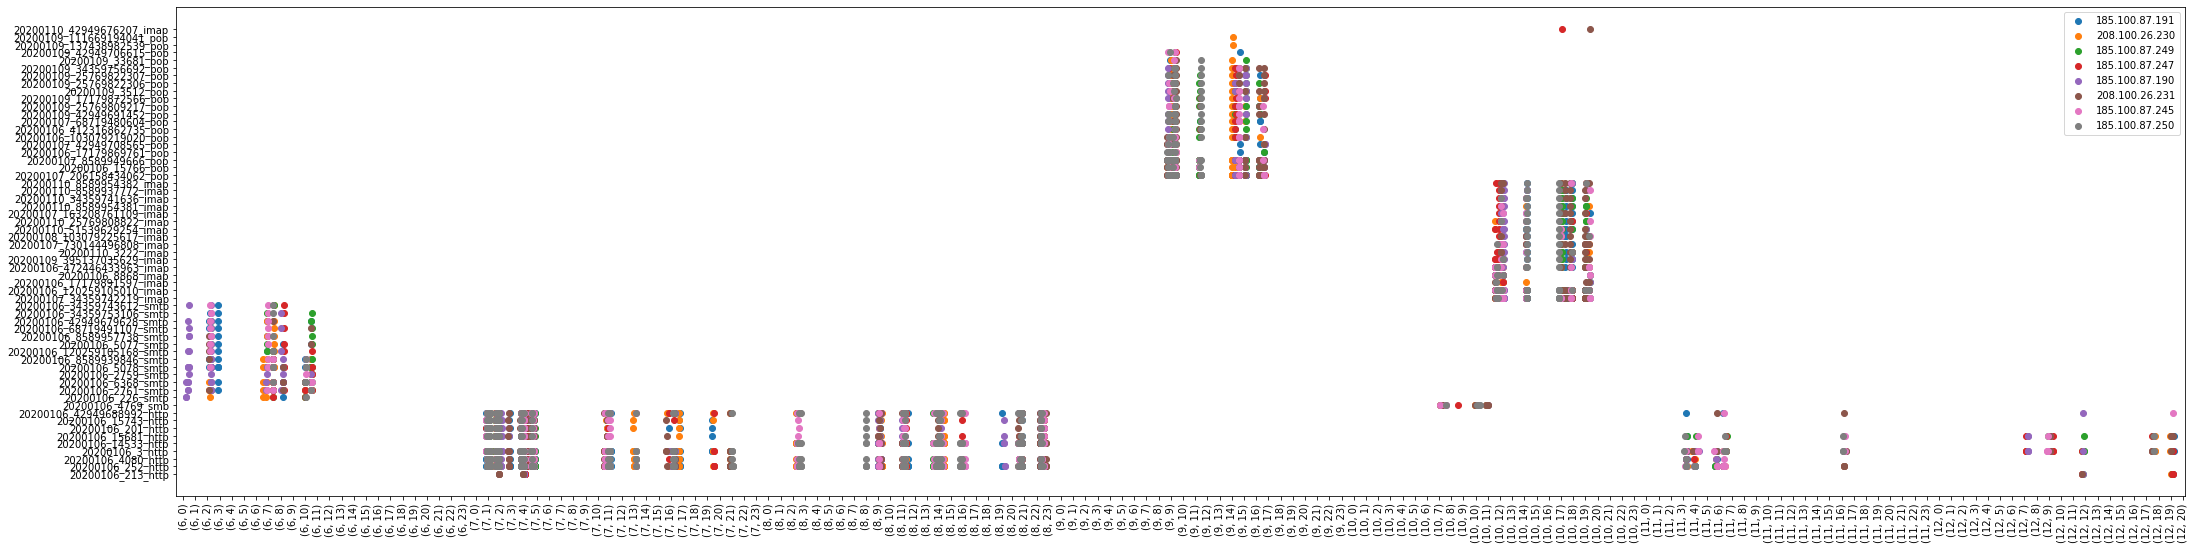

In [8]:
with open("/home/antslab/NAS1_RAID6/pcap_inter/2020_01_06/中華電信/case_pickles/CorrelateIP_DRAW_stat0.9.pkl", "rb")as file:
    group_df = pk.load(file)
gp = GroupPlotter(group_df)
gp.plotLifeCycle(0)